En este archivo realizo el EDA de cada csv creado por moneda, trayendome el DF que contiene, fechas desde enero del 2020 hasta la actualidad, precio de cierre, capitalizacion de mercado y volumen del mercado (la cantidad de una criptomoneda que se ha comprado y vendido en todos los intercambios en el dia)

## DOGECOIN
 Dogecoin comenzó como una broma, pero ha ganado una comunidad activa. Aunque tiene un enfoque menos serio, ha ganado popularidad y atención en los medios.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import time as t
import plotly.graph_objects as go
sns.set()


In [4]:
doge= pd.read_csv(r'C:\Users\flori\Desktop\DATA SCIENCE\LABS\Trabajos\tp2\Proyecto2_Data_Analytics\ETL\dogecoin.csv')

In [5]:
doge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1327 entries, 0 to 1326
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FECHAS          1327 non-null   object 
 1   PRECIO-usd      1327 non-null   float64
 2   MARKET_CAP-usd  1327 non-null   float64
 3   TOTAL_VOLUMES   1327 non-null   float64
 4   COIN_ID         1327 non-null   object 
dtypes: float64(3), object(2)
memory usage: 52.0+ KB


In [6]:
doge.describe()

,PRECIO-usd,MARKET_CAP-usd,TOTAL_VOLUMES
count,1327.000000,1.327000e+03,1.327000e+03
mean,0.097439,1.291698e+10,1.534093e+09
std,0.102527,1.337002e+10,3.932023e+09
min,0.001483,1.835883e+08,3.253959e+07
25%,0.003502,4.409433e+08,1.789438e+08
50%,0.071893,9.893577e+09,4.930869e+08
75%,0.138684,1.839067e+10,1.279450e+09
max,0.681842,8.879477e+10,5.096065e+10


Aca podemos ver los valores estadisticos

In [7]:
doge['FECHAS']=pd.to_datetime(doge['FECHAS'])

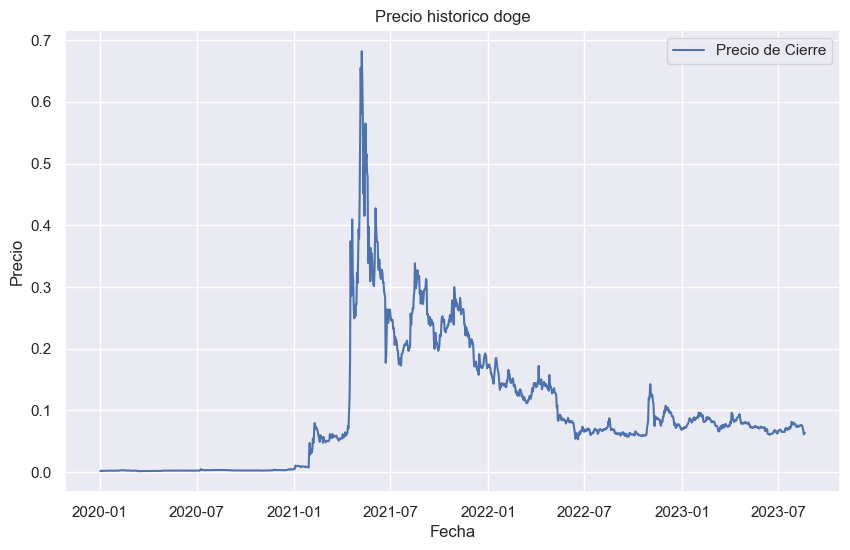

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(doge['FECHAS'], doge['PRECIO-usd'], label='Precio de Cierre')
plt.title('Precio historico doge')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()

Vemos como coincide el primer pico de alza cuando Elon Musk publica un tweet sobre la dogecoin en febrero del 2021. 

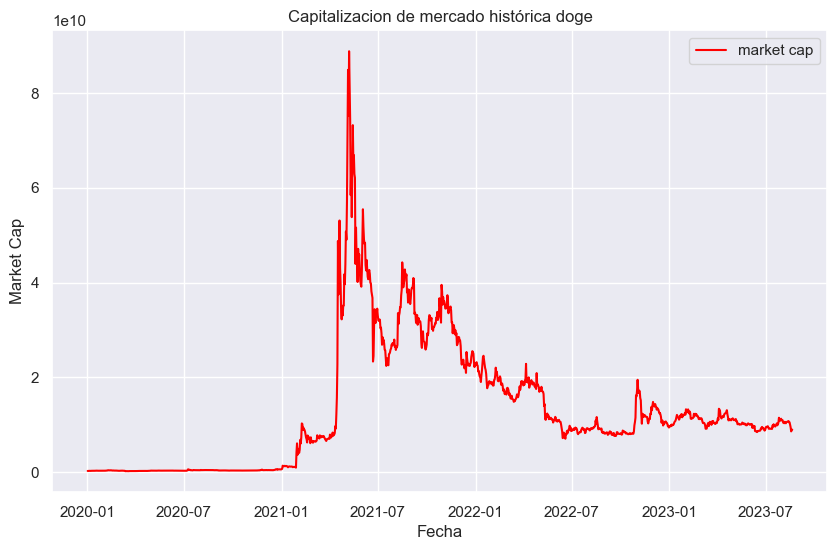

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(doge['FECHAS'],doge['MARKET_CAP-usd'], label='market cap', color='red')
plt.title('Capitalizacion de mercado histórica doge')
plt.xlabel('Fecha')
plt.ylabel('Market Cap')
plt.legend()
plt.grid(True)
plt.show()

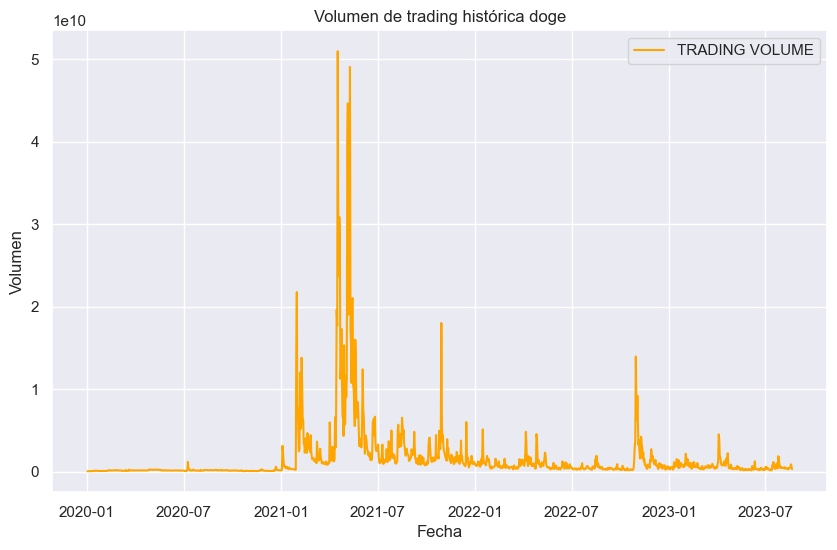

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(doge['FECHAS'], doge['TOTAL_VOLUMES'], label='TRADING VOLUME', color='orange')
plt.title('Volumen de trading histórica doge')
plt.xlabel('Fecha')
plt.ylabel('Volumen')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
from ta.momentum import RSIIndicator

# Calcular RSI
rsi_period = 14  # Período típico para RSI
indicator = RSIIndicator(doge['PRECIO-usd'], window=rsi_period)
doge['RSI'] = indicator.rsi()

doge.tail()

,FECHAS,PRECIO-usd,MARKET_CAP-usd,TOTAL_VOLUMES,COIN_ID,RSI
1322,2023-08-16,0.070818,9.960604e+09,4.857363e+08,dogecoin,41.469590
1323,2023-08-17,0.067312,9.467163e+09,5.408913e+08,dogecoin,35.008099
1324,2023-08-18,0.061057,8.590705e+09,8.754130e+08,dogecoin,26.941726
1325,2023-08-19,0.063189,8.883843e+09,5.861529e+08,dogecoin,32.638088
1326,2023-08-20,0.063734,8.963900e+09,2.813695e+08,dogecoin,34.053515


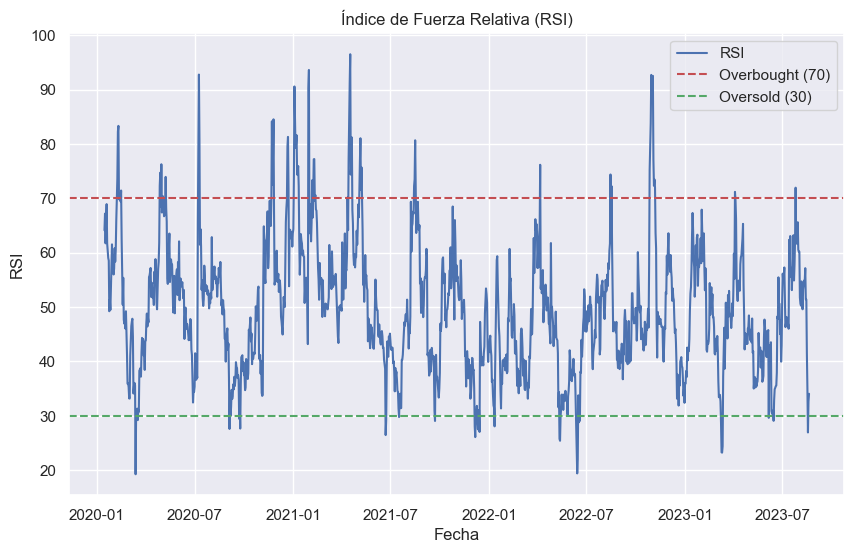

In [12]:
import matplotlib.pyplot as plt

# Graficar el RSI
plt.figure(figsize=(10, 6))
plt.plot(doge['FECHAS'], doge['RSI'], label='RSI')
plt.axhline(y=70, color='r', linestyle='--', label='Overbought (70)')
plt.axhline(y=30, color='g', linestyle='--', label='Oversold (30)')
plt.title('Índice de Fuerza Relativa (RSI)')
plt.xlabel('Fecha')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
rolling_window = 50
doge['MovingAverage'] = doge['PRECIO-usd'].rolling(window=rolling_window).mean()

print(doge.head())

      FECHAS  PRECIO-usd  MARKET_CAP-usd  TOTAL_VOLUMES   COIN_ID  RSI  \
0 2020-01-02    0.002026    2.485296e+08   3.857691e+07  dogecoin  NaN   
1 2020-01-03    0.002008    2.470949e+08   4.608031e+07  dogecoin  NaN   
2 2020-01-04    0.002049    2.515280e+08   4.086374e+07  dogecoin  NaN   
3 2020-01-05    0.002189    2.685943e+08   4.619690e+07  dogecoin  NaN   
4 2020-01-06    0.002070    2.542591e+08   3.253959e+07  dogecoin  NaN   

   MovingAverage  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  


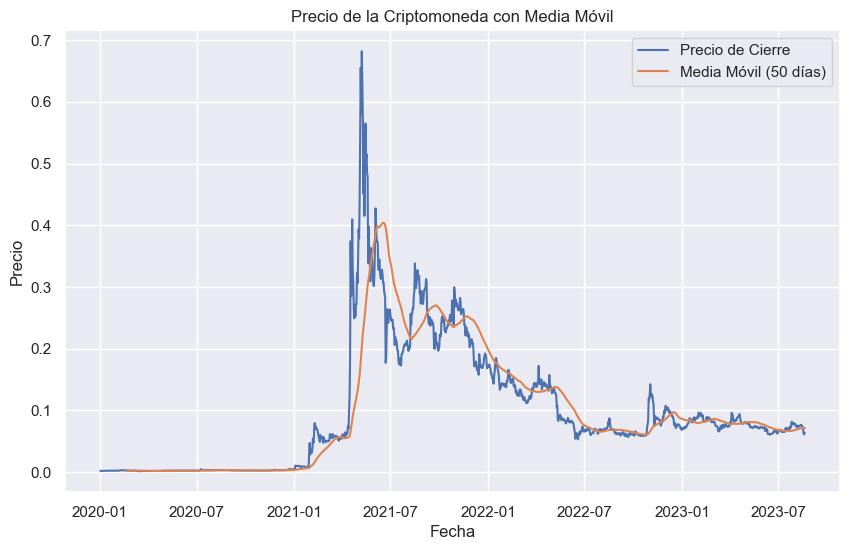

In [14]:
# Graficar los datos y la media móvil
plt.figure(figsize=(10, 6))
plt.plot(doge['FECHAS'], doge['PRECIO-usd'], label='Precio de Cierre')
plt.plot(doge['FECHAS'], doge['MovingAverage'], label=f'Media Móvil ({rolling_window} días)')
plt.title('Precio de la Criptomoneda con Media Móvil')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
doge.to_csv('dogecoinDB.csv', index= False)